# TechnoIT V1.0
## **Deep Learning**
---
*Importation des bibliothèques*

In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score

**Chargement des données à partir du Google Drive**

*Assemblage Google Drive dans Colaboratory*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.**  Décompresser le fichier du dataset *FaceMask.zip*

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#!unzip FaceMask.zip

**2.**  Charger les données d’apprentissage, de validation et de test de la base de données **Face-Mask** respectivement dans des conteneurs de type BatchDataset $train\_ds$, $val\_ds$, et $test\_ds$. Spécifier la taille des images à $28\times28$ (image\_size=(28, 28)) (utiliser la méthode image_dataset_from_directory de tf.keras.preprocessing)

In [ ]:
cd /content/drive/MyDrive/Face Mask Dataset

/content/drive/MyDrive/Face Mask Dataset


In [ ]:
ls

Test/  Train/  Validation/


*Ensemble d'apprentissage* 

In [ ]:
#train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    
    #_______
#)
#print (type(train_ds))

Found 10000 files belonging to 2 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


*Ensemble de validation*

In [ ]:
#val_ds =________

Found 800 files belonging to 2 classes.


*Ensemble de test*

In [ ]:
#test_ds =________

Found 992 files belonging to 2 classes.


**3.** Afficher la taille du premier batch de $train\_ds$. Puis afficher les labels (classes) du premier batch de $train\_ds$

In [ ]:
#for v in train_ds.take(1):
  #________________# v (images_batch, labels_batch) est un tuple
  #train_ds.take(n) Ne retourner que les exemples de n premiers lots (batch)

#class_names = train_ds._________________
#print(class_names)

(32, 28, 28, 1) (32,)
['WithMask', 'WithoutMask']


**4.** Afficher les 9 premières images de l’ensemble d’apprentissage du premier batch (3 images dans chaque ligne) *(Spécifier le nom de la classe sous chaque image)*

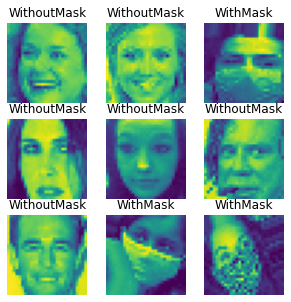

In [ ]:
#plt.figure(figsize=(5, 5))
#for images, labels in train_ds.take(1):
#________________________________________

***Configuration de l'environnement pour l'apprentissage***$*$  <br>
*BatchDataset. cache \& BatchDataset. prefetch* 

In [ ]:
#AUTOTUNE = tf.data.AUTOTUNE
#train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
#test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

**5.**<br>
$\clubsuit$ ***Construction du modèle $Fmask\_cnn$***

In [ ]:
#Fmask_cnn = tf.keras._________________

*Configuration des couches*
 <br><br>
*Les valeurs des pixels de chaque image en entrée sont transformés de sorte que l’échelle devient entre 0 et 1 (utiliser Rescaling de tf.keras.layers.experimental.preprocessing)

In [ ]:
#Fmask_cnn.add(____________________________________________________)

*Le premier bloc convolutif comporte deux couches : <br>
* Couche de convolution dont le nombre de filtres est 3, chacun de taille $3\times3$, **stride=1**, et **padding="same"**.
La sortie de cette couche doit être passée à une fonction d’activation ReLU (utiliser la classe Conv2D de tf.keras.layers)
* Couche de Maxpooling dont la taille du noyau est $2\times2$ avec stride=2 (utiliser la classe MaxPooling2D de tf.keras.layers)


In [ ]:
#________________


#par défaut# tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid')

*Le deuxième bloc convolutif comporte trois couches : 
* Deux couches de convolution dont le nombre de filtres est 2 chacun de taille **$3\times3$**, **stride=1**, et  **padding= "valid"**. La sortie de ces couches doit être passée à une fonction d’activation ReLU
* Couche de Maxpooling dont la taille du noyau est **$2\times2$** avec **stride=2**


In [ ]:
#________________


*Le troisième bloc comporte le Flatten (utiliser la classe Flatten de tf.keras.layers)<br>
*Le quatrième bloc constitue des couches entièrement connectées :
* Deux couches chacun de 128 neurones. L’activation des neurones de ces couches se fait par la fonction ReLU
* Une couche de sortie de 1 neurone retournant le résultat de la classification. *L’activation de ce neurone se fait par la fonction sigmoïde*. 
(Utiliser la classe Dense de tf.keras.layers pour configurer les couches cachées et de sortie)



In [ ]:
#________________


*Compilation du modèle*

In [ ]:
#Fmask_cnn.compile(_____________________________________________)

*Apprentissage*<br>
*Construire $Fmask\_cnn$  en spécifiant le nombre d’époques à 5 (passer l’ensemble de validation lors d’apprentissage)

In [ ]:
#history=Fmask_cnn.fit(______________________________________________________)

Epoch 1/3
313/313 [==============================] - 990s 3s/step - loss: 0.2713 - accuracy: 0.8905 - val_loss: 0.3007 - val_accuracy: 0.8712
Epoch 2/3
313/313 [==============================] - 1s 3ms/step - loss: 0.2188 - accuracy: 0.9124 - val_loss: 0.2745 - val_accuracy: 0.8825
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1925 - accuracy: 0.9247 - val_loss: 0.2421 - val_accuracy: 0.9000


**6.** Afficher une synthèse du modèle Fmask_cnn dans un TensorBoard

In [ ]:
#________________


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 2)         56        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 2)           0         
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

**7.** Représenter la courbe d’évaluation de $Fmask\_cnn$ en fonction du nombre époques sur les données d’apprentissage et les données de validation

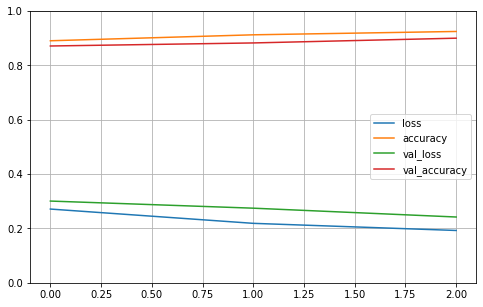

In [ ]:
#________________________________________
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**8.** Représenter graphiquement la matrice de confusion associée aux données de test selon $Fmask\_cnn$ 

[[446  37]
 [ 49 460]]


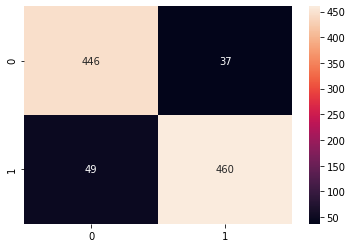

In [ ]:
#des_labels =  np.array([])
#for x, y in test_ds:
#  des_labels = np.concatenate([des_labels, y])

#pred_labels=_______________________________________

#_________________________________________________

#_________________________________________________

#cm = __________________________
#sns.heatmap(cm, annot=True, fmt='d')

**9.** Calculer les mesures de perte (loss) et de précision (accuracy) de $Fmask\_cnn$ sur l’ensemble de données de test

In [ ]:
#loss_t, acc_t = __________________________

#print(loss_t, acc_t) 
#__________________________

31/31 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9133
0.21622063219547272 0.913306474685669
0.9133064516129032
